In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np


In [2]:
# Lay du lieu test
data1 = pd.read_csv('test_Naver_noclass.csv')
df1 = data1.copy()
df1

,X1,X2,X3,X5,X6
0,19.676957,52.892229,41.863642,118.686268,4.815031
1,33.275590,96.283062,34.237463,145.601033,88.301486
2,12.489488,62.417142,57.994617,114.190049,56.902448
3,15.864336,37.165934,37.568592,120.567523,5.988551
4,1.101087,38.000000,43.152390,98.274107,23.910635
5,2.631740,29.504381,32.124998,127.139849,-0.460894
6,16.541216,42.000000,25.974394,120.631941,7.876731
7,13.113820,51.873520,35.882137,126.398188,0.535472
8,24.891999,49.278597,41.987212,113.477018,-2.005892
9,10.659859,42.577846,35.041929,130.178314,-3.388910


In [3]:
# Lay du lieu tu tap train
data2 = pd.read_csv('train_Naver.csv')
df2 = data2.copy()
df2

,X1,X2,X3,X5,X6,class
0,13.631223,33.258578,37.694240,131.306122,1.788870,0
1,7.194661,51.696887,60.068488,97.801085,42.136943,1
2,-5.845994,58.000000,48.764035,121.606859,-3.362045,0
3,9.064729,56.300000,41.760300,78.999454,23.041524,1
4,23.944825,40.796698,55.304846,98.622512,36.706395,1
...,...,...,...,...,...,...
274,16.964297,35.112814,21.540976,127.632875,7.986683,0
275,8.875541,57.000000,42.436230,126.472258,-2.144044,0
276,18.759135,33.774143,26.816347,116.797007,3.131910,0
277,23.896201,43.696665,47.290610,119.864938,27.283985,1


In [4]:
# Loai bo ngoai lai
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
data_clean = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis = 1)]
data_clean

,X1,X2,X3,X5,X6,class
0,13.631223,33.258578,37.694240,131.306122,1.788870,0
1,7.194661,51.696887,60.068488,97.801085,42.136943,1
2,-5.845994,58.000000,48.764035,121.606859,-3.362045,0
4,23.944825,40.796698,55.304846,98.622512,36.706395,1
5,13.444749,31.000000,25.253163,123.159251,1.429186,1
...,...,...,...,...,...,...
274,16.964297,35.112814,21.540976,127.632875,7.986683,0
275,8.875541,57.000000,42.436230,126.472258,-2.144044,0
276,18.759135,33.774143,26.816347,116.797007,3.131910,0
277,23.896201,43.696665,47.290610,119.864938,27.283985,1


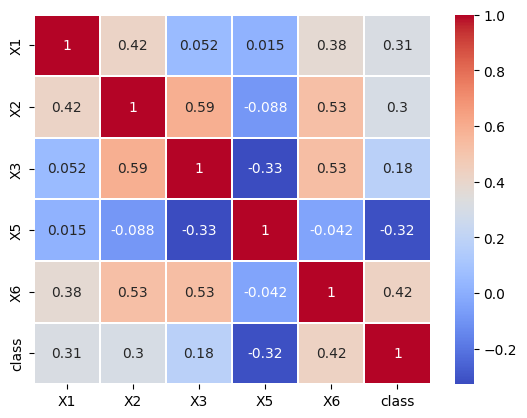

In [5]:
import seaborn as sns
# Tạo heatmap
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
# phương thức corr() để tính toán ma trận tương quan giữa tất cả các thuộc tính. Kết quả trả về là một DataFrame.
# Tham số annot=True được sử dụng để hiển thị giá trị tương quan trên từng ô của heatmap
# Tham số cmap được sử dụng để thiết lập bản đồ màu của heatmap
# coolwarm là bản đồ màu. 
# Tham số linewidths được sử dụng để thiết lập độ rộng của các đường viền giữa các ô.

# Hiển thị biểu đồ
mpl.pyplot.show()

In [6]:
# import thu vien
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df2.iloc[:, :-1], df2.iloc[:, -1], test_size=0.2, random_state=42)

In [17]:
# train du lieu
regressor = LogisticRegression()

regressor.fit(X_train, y_train)

# predict
predictions = regressor.predict(X_test)

# evaluate
print("LR classification accuracy", accuracy_score(y_test, predictions))

# matrix confusion
cm = confusion_matrix(y_test, predictions)
print(cm)

# f1 score
print("LR f1 score", f1_score(y_test, predictions, average="macro"))

LR classification accuracy 0.875
[[14  4]
 [ 3 35]]
LR f1 score 0.8545454545454545


In [18]:
predictions = regressor.predict(df1)
display(predictions)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [19]:
df3 = pd.DataFrame({'class': predictions})
df3

,class
0,0
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,0
9,0


In [62]:
df3 =pd.concat([df1, df3], axis = 1)
df3 

,X1,X2,X3,X5,X6,class
0,19.676957,52.892229,41.863642,118.686268,4.815031,0
1,33.275590,96.283062,34.237463,145.601033,88.301486,1
2,12.489488,62.417142,57.994617,114.190049,56.902448,1
3,15.864336,37.165934,37.568592,120.567523,5.988551,1
4,1.101087,38.000000,43.152390,98.274107,23.910635,1
5,2.631740,29.504381,32.124998,127.139849,-0.460894,0
6,16.541216,42.000000,25.974394,120.631941,7.876731,1
7,13.113820,51.873520,35.882137,126.398188,0.535472,0
8,24.891999,49.278597,41.987212,113.477018,-2.005892,0
9,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

# Tạo mô hình Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Áp dụng 5-Fold Cross Validation trên tập dữ liệu iris bằng mô hình Decision Tree Classifier
scores = cross_val_score(clf, X_test, y_test, cv=5)

# In kết quả cross validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.89 (+/- 0.18)


In [113]:
y_pred = clf.predict(df1)
print(y_pred)

[1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1]


In [114]:
df4 = pd.DataFrame({'class' : y_pred})
df4 = pd.concat([df1, df4],axis = 1)
df4

,X1,X2,X3,X5,X6,class
0,19.676957,52.892229,41.863642,118.686268,4.815031,1
1,33.275590,96.283062,34.237463,145.601033,88.301486,1
2,12.489488,62.417142,57.994617,114.190049,56.902448,1
3,15.864336,37.165934,37.568592,120.567523,5.988551,0
4,1.101087,38.000000,43.152390,98.274107,23.910635,1
5,2.631740,29.504381,32.124998,127.139849,-0.460894,0
6,16.541216,42.000000,25.974394,120.631941,7.876731,1
7,13.113820,51.873520,35.882137,126.398188,0.535472,0
8,24.891999,49.278597,41.987212,113.477018,-2.005892,0
9,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [ ]:
df4.to_csv('test_haveclass_decisiontree.csv')
df3.to_csv('test_haveclass_logisticregression.csv')